# Data Science Programming Assignment 2 - Group 12

- Submitted by - Aswathy Gopalakrishnan, Roshna Roy, Yonge Li

**The dataset used is "Yield per hectar and total production in regions/country for different crops. Yearly data 1965 - 2023". Eventhough data is available from 1965, the last 10 years of data is considered for exploring the tasks in hand.**

**For the tasks in hand, We have used the dataset saved after preprocessing in the Assignment 1**

## 📘 Tasks Based on Exercise 4: Machine Learning with Scikit-learn

This notebook contains exercises on machine learning with the Scikit-learn library. In particular, we'll focus on understanding the Scikit-learn API for training, applying, and evaluating models; how to prepare Pandas data for use with Scikit-learn; and how to visualize predictions made using Scikit-learn.

### Learning Goals

- Understand how to _train and apply different machine learning algorithms_ with Scikit-learn.
- Know how to _transform data_ between Pandas and the Scikit-learn API.
- Know how to _perform model validation_ with Scikit-learn.


In [28]:
# !pip install xgboost


In [29]:
try:
    from rich import load_ipython_extension
    %load_ext rich
except ImportError:
    try:
        from rich import pretty
        pretty.install()
    except ImportError:
        pass

The rich extension is already loaded. To reload it, use:
  %reload_ext rich


In [30]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pingouin as pg
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from xgboost import XGBRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

sns.set()

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:5                                                                                    │
│                                                                                                  │
│    2 import numpy as np                                                                          │
│    3 import pandas as pd                                                                         │
│    4 import matplotlib.pyplot as plt                                                             │
│ ❱  5 import pingouin as pg                                                                       │
│    6 import seaborn as sns                                                                       │
│    7                                                                                             │
│    8 from sklearn.model_selection import train_test_split                                        │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
ModuleNotFoundError: No module named 'pingouin'

In [ ]:
# Load a predefined dataset from Seaborn
# data = "Yield_data.csv"
data = "preprocessed_yield_data.csv"
df = pd.read_csv(data, encoding='utf-8', encoding_errors='ignore')
df.head()

- - - 
## Regression


Scatter plots using seaborn with a _linear regression_ line out of the box:

In [ ]:

# convert the table
df_long = df.melt(
    id_vars=['region', 'crop'],
    value_vars=[str(y) for y in range(2014, 2024)],
    var_name='year',
    value_name='production'
)
df_long['year'] = df_long['year'].astype(int)  
df_long

In [ ]:
selected_region = '01 Stockholm county'
selected_crop = 'winter wheat'
subset = df_long[(df_long['region'] == selected_region) & (df_long['crop'] == selected_crop)]
subset

In [ ]:
orange = sns.color_palette()[1]

sns.regplot(
    data=subset,
    x="year",
    y="production",
    ci=False,
    line_kws={"color": orange}
);


**1.reproduce & plot a linear regression using the Scikit-learn API** 

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)

X = subset[['year']]
y = subset['production']
model.fit(X, y)
(model.coef_, model.intercept_)

In [ ]:
xfit = np.linspace(2014,2023)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

In [ ]:

plt.scatter(subset['year'], subset['production'], label='Actual Data')
plt.plot(xfit, yfit, c=orange, lw=2);


**polynomial(degree 3) regression using Seaborn.** 

In [ ]:

sns.regplot(
    data=subset,
    x="year",
    y="production",
    order=3,  
    ci=False,
    line_kws={"color": orange}
);


**2. reproduce & plot a polynomial(degree 3) regression using the Scikit-learn API?**

This requires a _pipeline_ approach, where we first transform the input features before fitting our regular regression model.  Like before, you should obtain a visualization that shows the same data as the Seaborn plot above.

In [ ]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

model = make_pipeline(
    PolynomialFeatures(3),LinearRegression() )


X = subset[['year']]
y = subset['production']
model.fit(X, y)
(model[1].coef_, model[1].intercept_)


In [ ]:
xfit = np.linspace(2014,2023)
# Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)
plt.scatter(X.squeeze(), y)
plt.plot(xfit, yfit, c=orange, lw=2);

- - - 
# Clustering


In [ ]:

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as GMM
from sklearn.preprocessing import StandardScaler

data = "preprocessed_yield_data.csv"
df = pd.read_csv(data, encoding='utf-8', encoding_errors='ignore')



In [ ]:
from sklearn.mixture import GaussianMixture as GMM
from sklearn.preprocessing import StandardScaler


# feature selection: 
X = df[["mean_production", "2023"]]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="mean_production",
    y="2023",
    hue="crop",
    palette="viridis"
)
plt.title("Original Data Distribution by Crop Type")
plt.xlabel("Mean Production (kg/ha)")
plt.ylabel("2023 Production (kg/ha)")
plt.show()

### K-means clustering

In [ ]:

model_kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
y_kmeans = model_kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_scaled[:, 0],  
    y=X_scaled[:, 1],  
    hue=y_kmeans,
    palette="viridis"
)
plt.title("K-means Clustering (n_clusters=3)")
plt.xlabel("Standardized Mean Production")
plt.ylabel("Standardized 2023 Production")
plt.show()


### Gaussian Mixture Model (GMM)

In [ ]:
from sklearn.mixture import GaussianMixture as GMM


model_gmm = GMM(n_components=3, random_state=0)
y_gmm = model_gmm.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_scaled[:, 0],
    y=X_scaled[:, 1],
    hue=y_gmm,
    palette="viridis"
)
plt.title("GMM Clustering (n_components=3)")
plt.xlabel("Standardized Mean Production")
plt.ylabel("Standardized 2023 Production")
plt.show()


### Run the GMM model three times

In [ ]:

def plot_gmm(i, ax):
    model = GMM(n_components=3, random_state=7+i)
    y = model.fit_predict(X_scaled)
    sns.scatterplot(
        ax=ax,
        x=X_scaled[:, 0],
        y=X_scaled[:, 1],
        hue=y,
        palette="viridis",
        legend=False
    )
    ax.set_title(f"GMM Run {i+1}")

fig, axes = plt.subplots(1, 3, figsize=(16, 4))
for i in range(3):
    plot_gmm(i, axes[i])
plt.tight_layout()
plt.show()


### Single GMM with Multiple Initializations (n_init=10)

In [ ]:

model_gmm_optim = GMM(n_components=3, n_init=10, random_state=0)
y_gmm_optim = model_gmm_optim.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_scaled[:, 0],
    y=X_scaled[:, 1],
    hue=y_gmm_optim,
    palette="viridis"
)
plt.title("Optimized GMM (n_init=10)")
plt.xlabel("Standardized Mean Production")
plt.ylabel("Standardized 2023 Production")
plt.show()

In [ ]:
df['cluster'] = y_gmm_optim
cluster_profile = df.groupby('cluster').agg({
    'mean_production': ['mean', 'std'],
    '2023': ['mean', 'std'],
    'crop': lambda x: x.value_counts().index[0]  
})
print(cluster_profile)

- - - 
# Decision Trees & Model Validation



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

data = "preprocessed_yield_data.csv"
df = pd.read_csv(data, encoding='utf-8', encoding_errors='ignore')


### 1, split the data into train and test

In [ ]:


X = df.drop(columns=['region', 'crop'])  
y = df['crop']

# crop_counts = y.value_counts()

# valid_crops = crop_counts[crop_counts >= 2].index

# df_filtered = df[df['crop'].isin(valid_crops)]

# X = df_filtered.drop(columns=['region', 'crop'])
# y = df_filtered['crop']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    train_size=0.8,
    # stratify=y,  
    random_state=1
)



### 2,Train a decision tree classifier and produce predictions on the test set

In [ ]:

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(
    random_state=66,
    max_depth=3  
)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred

### 3, evaluate the classifier performs

In [ ]:

from sklearn.metrics import accuracy_score, f1_score

accuracy_score(y_test, y_pred)

In [ ]:
f1_score(y_test, y_pred, average=None, labels=clf.classes_)

In [ ]:
(y_test != y_pred).sum()  # number of wrong predictions

### 4, plot a confusion matrix

In [ ]:

from sklearn.metrics import confusion_matrix

plt.figure(figsize=(10, 8))
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(
    mat,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=clf.classes_,
    yticklabels=clf.classes_
)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### 5, decesion tree visilization

In [ ]:

plt.figure(figsize=(20, 12))
from sklearn.tree import plot_tree

plot_tree(
    clf,
    feature_names=X.columns,
    class_names=clf.classes_,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()

- - - 
# SVMs, Hyperparameters, and Cross-Validation


_Note:_ If you try to follow the book, you might again get an `ImportError` on some occasions. Functions related to model validation can now be found in `sklearn.model_selection`, for example:

```python
from sklearn.model_selection import GridSearchCV, cross_val_score
```

**1. Split data into _train_ and _test_ set again** 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the preprocessed yield data
data = "preprocessed_yield_data.csv"
df = pd.read_csv(data, encoding='utf-8', encoding_errors='ignore')

# Use numerical features (yearly yield and average yield) to predict crop type
X = df.drop(columns=['region', 'crop'])  # Remove non-feature columns
y = df['crop']  

# # Count the number of instances for each crop category
# crop_counts = y.value_counts()

# # Keep only crop categories that appear at least 2 times
# valid_crops = crop_counts[crop_counts >= 2].index

# # Filter the dataset to include only those valid crop categories
# df_filtered = df[df['crop'].isin(valid_crops)]

# # Define the features and target variable again after filtering
# X = df_filtered.drop(columns=['region', 'crop'])
# y = df_filtered['crop']



# Standardize the data (SVM is sensitive to feature scales)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Stratified sampling to preserve class distribution
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    train_size=0.8,
    # stratify=y,   # Ensures the training and test sets have the same proportion of each class
    random_state=2     
)

**2. Fit a support vector classifier to the data and evaluate its accuracy!** Use a "linear" kernel and leave the regularization parameter `C=1.0` at its default value.

In [ ]:

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

model = SVC(C=1.0, kernel="linear")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_pred, y_test)

**3. Using the same classifier as above, perform _10-fold cross-validation_ to evaluate its accuracy!**  How different is the value from the single evaluation you did before?

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=10)
scores.mean()

**4. Perform grid search to find the best kernel and regularization value for our task!** Support vector machines are very sensitive to these two hyperparameters in particular. How many parameters you evaluate is up to you (it can take a look time to perform grid search with many parameters!), but you should look at least the "linear" and "rbf" kernels as well as C=1, C=10, C=100.


In [ ]:

from sklearn.model_selection import GridSearchCV

param_grid = [
    {"C": [1, 10, 100, 1000], "kernel": ["linear"]},
    {"C": [1, 10, 100, 1000], "gamma": [0.001, 0.0001], "kernel": ["rbf"]},
]

grid = GridSearchCV(SVC(), param_grid, scoring="accuracy")
grid.fit(X_train, y_train)
grid.best_params_

### 5, evaluate the best estimator

In [ ]:
model = grid.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_pred, y_test)

In [ ]:
scores = cross_val_score(model, X, y, cv=10)
scores.mean()

# 📘 Tasks Based on Exercise 5

Load the data, and perform one-hot encoding for the categorical data. We have two categorical features, 'region', and 'crop'.

In [ ]:
df = pd.read_csv("preprocessed_yield_data.csv")
one_hot_encoded = pd.get_dummies(df['crop'])
df = pd.concat([df, one_hot_encoded], axis=1)
one_hot_encoded_2 = pd.get_dummies(df['region'])
df = df.join(one_hot_encoded_2)
df


Instead of binary values, the values are in bool (True or False). We need to convert it to 0 and 1

In [ ]:
for crop in df['crop']:
    df[crop] = df[crop].astype(int)
    
for region in df['region']:
    df[region] = df[region].astype(int)
    
# df.drop(columns=['crop'], inplace=True)    
# df.drop(columns=['region'], inplace=True)

Perform standard scaling to scale all the features to the same level

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

As the dataset doesn't have any features relevant for classificatiion task. We have chosen to perform regression. For this, we are choosing '2023' as the target feature, and it's prediction will be based on the yield in other years, based on region and crop.XGB regressor is used for modelling

In [ ]:
X = df.drop(columns=['2023','region','crop'])  # region and crop are removed as catergorical
y = df['2023']  # target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model =XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)



## Permutation Feature Importance

**Permutation feature importance**.  Its core idea is simple: for a given feature, shuffle the feature column and see how the classifier accuracy changes.  If it drops a lot, the feature was probably important; if it stays the same, the feature didn't matter.

**Calculate permutation importance over the input features.**
  - **Which feature is the most important for the classifier?**
  - **Which features (if any) are not important at all?**

In [ ]:
from sklearn.inspection import permutation_importance
pi = permutation_importance(model, X_test, y_test, n_repeats=50, random_state=0)
pi['importances_mean']

In [ ]:
pd.DataFrame([X.columns, pi['importances_mean']]).T.set_index(0)

** Change your train/test data** (e.g. `X_train`, `X_test`) **to only include the _two most important features_.** 

In [ ]:
feats = ["2018", "2021"]
X_train, X_test = X_train[feats], X_test[feats]
model.fit(X_train, y_train)
y_pred_good = model.predict(X_test)
r2 = r2_score(y_test, y_pred_good)
mse_good =mean_squared_error(y_test, y_pred_good)
print("R^2 Score:", r2)
print("mse:", mse_good)

**Do the same thing, but train the model on the _two least important features only_.** 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=0
)
feats = ["22 Vsternorrland county", "peas"]
X_train, X_test = X_train[feats], X_test[feats]
model.fit(X_train, y_train)
y_pred_bad = model.predict(X_test)
r2 = r2_score(y_test, y_pred_bad)
mse = mean_squared_error(y_test, y_pred_bad)
print("R^2 Score:", r2)
print("mse:", mse)

**What accuracy score would you get if you always guessed the majority class?**

In [ ]:
y_train.mean()


In [ ]:
y_majority = [y.mean()] * len(y_test)

# Now you can calculate the Mean Absolute Error for this baseline
r2_score(y_test, y_majority)
mean_squared_error(y_test, y_majority)


We could observe the evauation metrics changing according to the feature we select. This tells us the importance of choosing the right feature.

## Statistical Testing


**Which of our measurement variables are _normally distributed_?** Checking for a normal distribution is useful, because it is often a requirement for using other metrics that the data is normally distributed.

In [ ]:
# df = pd.read_csv("preprocessed_yield_data.csv")
normality_results = pg.normality(df[["2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022", "mean_production","Winter triticale","corn",	"field beans","mixed grain","oats","oil flax","peas","potatoes for processing of starch","rye","spring barley","spring rape","spring wheat","sugar beets","table potatoes","temporary grasses","temporary grasses. First cut","temporary grasses. Re-growth","winter barley","winter rape","winter wheat","01 Stockholm county","03 Uppsala county","04 Sdermanland county","05 stergtland county","06 Jnkping county","07 Kronoberg county","08 Kalmar county","09 Gotland county","10 Blekinge county","12 Skne county","13 Halland county","14 Vstra Gtaland county","17 Vrmland county","18 rebro county","19 Vstmanland county","20 Dalarna county","21 Gvleborg county","22 Vsternorrland county","23 Jmtland county","24 Vsterbotten county","25 Norrbotten county"
 ]])
print(normality_results)

**Which of the measurement variables are _correlated_?** Perform a pairwise correlation analysis with all the columns of our dataframe. Use Pearson correlation if the variables are normally distributed, and Spearman correlation if not.

In [ ]:
correlation_results = pg.pairwise_corr(df[["2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022", "mean_production","Winter triticale","corn",	"field beans","mixed grain","oats","oil flax","peas","potatoes for processing of starch","rye","spring barley","spring rape","spring wheat","sugar beets","table potatoes","temporary grasses","temporary grasses. First cut","temporary grasses. Re-growth","winter barley","winter rape","winter wheat","01 Stockholm county","03 Uppsala county","04 Sdermanland county","05 stergtland county","06 Jnkping county","07 Kronoberg county","08 Kalmar county","09 Gotland county","10 Blekinge county","12 Skne county","13 Halland county","14 Vstra Gtaland county","17 Vrmland county","18 rebro county","19 Vstmanland county","20 Dalarna county","21 Gvleborg county","22 Vsternorrland county","23 Jmtland county","24 Vsterbotten county","25 Norrbotten county"
]], method='pearson')
print(correlation_results)

High Correlation Values: From the output, it looks like many of our yearly yield pairs have very high correlation coefficients (around (0.99)). This suggests that yields in one year tend to be very similar to yields in the other year.

Confidence Intervals: The confidence intervals (CI95%) close to (1) (or (-1)) corroborate that the correlations are strong.

**Calculate performance metrics directly to evaluate model quality.**
Create a DataFrame that compares predicted values to actual values without relying on strict equality.

In [ ]:
df_predictions = pd.DataFrame({
    'Actual': y_test,
    'Good Predicted': y_pred_good,
    'Bad Predicted': y_pred_bad,
    'Majority Predicted': y_majority
})

print(df_predictions.head())

**Is the "bad" model still significantly better than the "majority" class model?**

We will test this using t-test as we have a regression model here

In [ ]:
from scipy.stats import ttest_rel

# Calculate errors for both models
error_majority = abs(y_test - y_majority)
error_bad = abs(y_test - y_pred_bad)

# Perform the paired t-test
t_stat, p_value = ttest_rel(error_majority, error_bad)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

A T-statistic of 3.851 indicates that there is a considerable difference between the errors from the "majority" model and the "bad" model. The higher the T-statistic, the more confident you can be that the different means are not due to chance. The P-value of 0.0004504741519397783 is very small and is significantly lower than the common significance level thresholds.

Conclusion: The predictive performance of the "majority" model is significantly better than that of the "bad" model.

## Dimensionality Reduction

Dimensionality reduction techniques like Principal Component Analysis (PCA) and t-distributed Stochastic Neighbor Embedding (t-SNE) are powerful tools for simplifying high-dimensional datasets by projecting them into lower-dimensional spaces. 

In [ ]:
dfy = pd.read_csv("preprocessed_yield_data.csv")
dfy = dfy.set_index(dfy.columns[0]) 
dfy.index.name = "region"
dfy

**Perform a principal component analysis (PCA) to map the GloVe vectors into 2-dimensional space.** Two dimensions are a common choice to make them suitable for visualization.

If you are using Scikit-learn to do this, you will find that the 2-dimensional vectors are returned as a NumPy array.

- **Also merge this back into a DataFrame that has the actual words as an index again**

In [ ]:
df_select = dfy.select_dtypes(include=['number']) # only numerical columns
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_select)
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'], index=dfy.index)

In [ ]:
df_pca = pd.DataFrame(df_pca)
df_pca["region"] = dfy.index
df_pca = df_pca.set_index("region")
df_pca

**Plot some 2-dimensional word vectors using the following function.**  It defines some words in some categories, takes _the first two dimensions_ and plots them as a scatterplot, along with labels of the actual words.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_words(df):
    
    word_cats = {
        "Svealand": ["01 Stockholm county", "03 Uppsala county"],
        "Gotaland": ["06 Jnkping county","13 Halland county", "14 Vstra Gtaland county", "12 Skne county"],
        "Norrland": ["25 Norrbotten county", "24 Vsterbotten county", "23 Jmtland county"],
    "Mellansverige": [ "17 Vrmland county", "20 Dalarna county"]
    }

    fig, ax = plt.subplots(figsize=(8, 6))  # Adjust figure size
    pal = sns.color_palette("Set2")  # Softer color contrast

    for i, (category, regions) in enumerate(word_cats.items()):
        for region in regions:
            try:
                pos = df.loc[region].iloc[0][0], df.loc[region].iloc[0][1]
                ax.scatter(*pos, color=pal[i], label=category if region == regions[0] else "")
                ax.annotate(region, pos, color=pal[i], xytext=(5, 5), textcoords="offset points")
            except KeyError:
                print(f"Region '{region}' not found in DataFrame.")
            except ValueError:
                print(f"Invalid position data for region '{region}': {pos}")

    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_title("PCA Projection of Regions")
    ax.legend()  # Add legend for categories
    plt.show()

# Call the function
plot_words(df_pca)

**Perform a t-SNE transformation and plot it as well!** 

In [ ]:
from sklearn.manifold import TSNE

def run_tsne(**kwargs):
    df1_numeric = dfy.select_dtypes(include=[float, int]).fillna(0)
    df1_tsne = TSNE(learning_rate="auto", init="random", **kwargs).fit_transform(df1_numeric)
    df1_tsne = pd.DataFrame(df1_tsne)
    df1_tsne["region"] = dfy.index
    df1_tsne = df1_tsne.set_index("region")
    return df1_tsne

plot_words(run_tsne(random_state=0))

**Repeat the t-SNE plot with different random states and perplexity values.** t-SNE is a very powerful and useful technique, but it is sensitive to hyperparameters.

In [ ]:
plot_words(run_tsne(random_state=0, perplexity=5))
plot_words(run_tsne(random_state=0, perplexity=10))
plot_words(run_tsne(random_state=0, perplexity=25))
plot_words(run_tsne(random_state=0, perplexity=50))

In [ ]:
plot_words(run_tsne(random_state=42, perplexity=5))
plot_words(run_tsne(random_state=42, perplexity=10))
plot_words(run_tsne(random_state=42, perplexity=25))
plot_words(run_tsne(random_state=42, perplexity=50))

# 📘 Tasks Based on Exercise 10: Statistical Modeling

In [78]:
# Load the data into a Pandas DataFrame
data = "preprocessed_yield_data.csv"
df = pd.read_csv(data, encoding='utf-8', encoding_errors='ignore')

  ### Correlation Analysis
**1. Direct Calculation Using corr()**

In [79]:
import pandas as pd
# Compute Pearson correlation directly
correlation = df['2014'].corr(df['2015'])
print(f"Direct Pearson correlation between 2014 and 2015: {correlation:.6f}")

Direct Pearson correlation between 2014 and 2015: 0.987520


In [80]:
# Pipeline-style
cor_summary = (
    df[df["region"] != "unknown"]
    .groupby(["region", "crop"])[["2014", "2015"]]
    .mean()
    .reset_index()
)
cor_summary_corr = cor_summary["2014"].corr(cor_summary["2015"])
print("Pipeline Pearson correlation:", cor_summary_corr)


Pipeline Pearson correlation: 0.9875201521874314


**2. Compute the pairwise Pearson correlation between multiple years.**

In [110]:
years = ["2015", "2016","2017", "2018", "2019"]

# Calculate pairwise correlation
pairwise_data = df[df["region"] != "unknown"].groupby(["region", "crop"])[years].mean()
pairwise_corr = pairwise_data.corr()

pairwise_corr


,2015,2016,2017,2018,2019
2015,1.000000,0.994496,0.991774,0.985644,0.985540
2016,0.994496,1.000000,0.995193,0.990593,0.990723
2017,0.991774,0.995193,1.000000,0.985486,0.989793
2018,0.985644,0.990593,0.985486,1.000000,0.993068
2019,0.985540,0.990723,0.989793,0.993068,1.000000


**3. Computes the Pearson correlation matrix.**

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
# Step 2: Select numeric columns
numeric_df = df.select_dtypes(include='number')

# Step 3: Compute the Pearson correlation matrix
corr_matrix = numeric_df.corr(method='pearson')

# Step 4: Convert the correlation matrix to long format
corr_long = corr_matrix.stack().reset_index()
corr_long.columns = ['X', 'Y', 'cor']

# Step 5: Remove duplicate pairs and self-correlations
# Create a set of sorted variable pairs to identify duplicates
corr_long['pair'] = corr_long.apply(lambda row: tuple(sorted([row['X'], row['Y']])), axis=1)
# Drop duplicate pairs
corr_long = corr_long.drop_duplicates(subset='pair')
# Exclude self-correlations
corr_long = corr_long[corr_long['X'] != corr_long['Y']]
# Drop the auxiliary 'pair' column
corr_long = corr_long.drop(columns='pair')

# Display the resulting DataFrame
print(corr_long)

        X                Y       cor
1    2014             2015  0.987520
2    2014             2016  0.992308
3    2014             2017  0.992487
4    2014             2018  0.988599
5    2014             2019  0.994734
6    2014             2020  0.995152
7    2014             2021  0.996706
8    2014             2022  0.990614
9    2014             2023  0.991875
10   2014  mean_production  0.996929
13   2015             2016  0.994496
14   2015             2017  0.991774
15   2015             2018  0.985644
16   2015             2019  0.985540
17   2015             2020  0.988661
18   2015             2021  0.983263
19   2015             2022  0.988543
20   2015             2023  0.990152
21   2015  mean_production  0.993157
25   2016             2017  0.995193
26   2016             2018  0.990593
27   2016             2019  0.990723
28   2016             2020  0.994858
29   2016             2021  0.990846
30   2016             2022  0.993850
31   2016             2023  0.993291
3

**4. Plot the heatmap.**

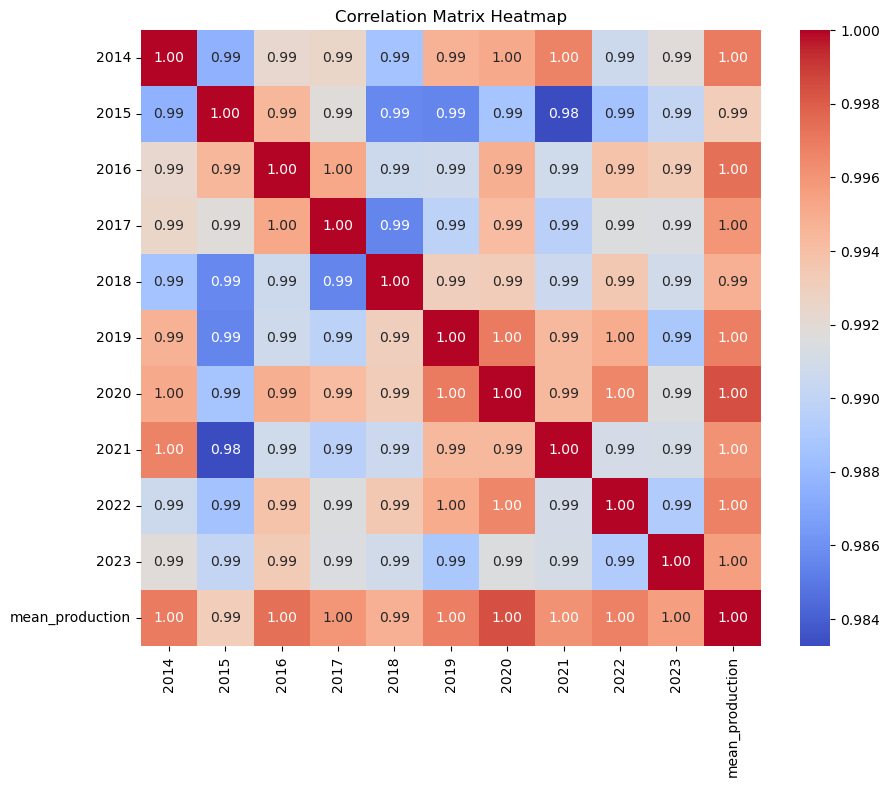

In [93]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

  ### Linear Regression Modeling
**5.The linear regression model in using statsmodels.**

In [94]:
import statsmodels.api as sm
# Define predictor (2020) and response (mean_production)
X = df['2020']
y = df['mean_production']

# Add constant for intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print the regression formula
intercept, slope = model.params
print(f"mean_production = {intercept:.2f} + {slope:.2f} * 2020_yield")


mean_production = -99.58 + 0.95 * 2020_yield


**6. The plot of data points and the regression line using matplotlib and statsmodels.**

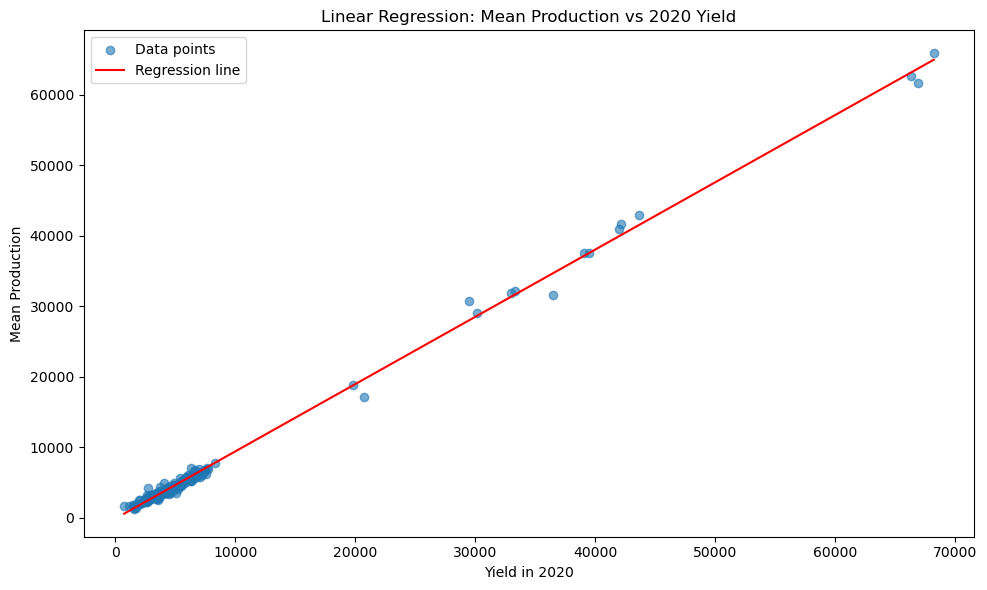

In [96]:
import matplotlib.pyplot as plt
# Define predictor and response
X = df['2020']
y = df['mean_production']

# Fit linear regression model
X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()

# Create a data grid for prediction
x_grid = np.linspace(X.min(), X.max(), 100)
x_grid_const = sm.add_constant(x_grid)
y_pred = model.predict(x_grid_const)

# Plot points and regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Data points', alpha=0.6)
plt.plot(x_grid, y_pred, color='red', label='Regression line')
plt.xlabel('Yield in 2020')
plt.ylabel('Mean Production')
plt.title('Linear Regression: Mean Production vs 2020 Yield')
plt.legend()
plt.tight_layout()
plt.show()

**7. Plot the residuals from the linear regression model.**

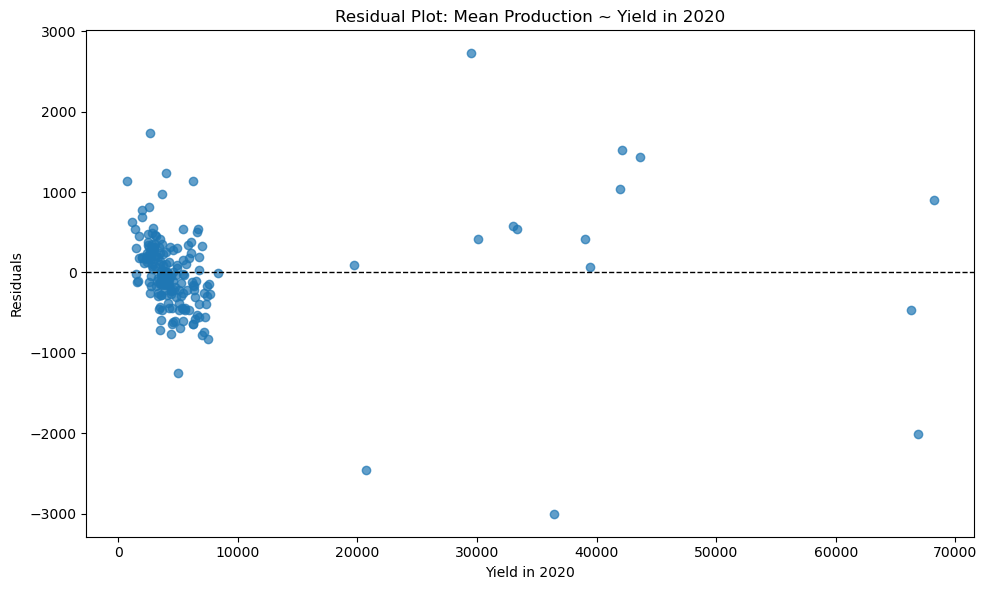

In [97]:
# Define predictor and response
X = df['2020']
y = df['mean_production']

# Fit the linear model
X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()

# Add residuals to the original DataFrame
df['resid'] = model.resid  # residuals = actual - predicted

# Plot residuals
plt.figure(figsize=(10, 6))
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # geom_ref_line(h = 0)
plt.scatter(df['2020'], df['resid'], alpha=0.7)
plt.xlabel('Yield in 2020')
plt.ylabel('Residuals')
plt.title('Residual Plot: Mean Production ~ Yield in 2020')
plt.tight_layout()
plt.show()

**8. This performs multiple linear regression using one numeric and one categorical feature**

In [98]:
from sklearn.linear_model import LinearRegression
# Drop rows with missing values in relevant columns
df = df.dropna(subset=['2015', '2020', 'crop'])

# One-hot encode 'crop' and prepare features
X_multi = pd.get_dummies(df[['2015', 'crop']], drop_first=True)
y_multi = df['2020']

# Fit linear regression model
model_multi = LinearRegression()
model_multi.fit(X_multi, y_multi)

# Show coefficients
coeffs = pd.Series(model_multi.coef_, index=X_multi.columns)
print("Coefficients:")
print(coeffs)
print("Intercept:", model_multi.intercept_)


Coefficients:
2015                                          0.682804
crop_corn                                  -583.898513
crop_field beans                          -1774.356104
crop_mixed grain                           -634.103109
crop_oats                                  -774.163117
crop_oil flax                             -1746.992596
crop_peas                                 -1271.575622
crop_potatoes for processing of starch    11403.034186
crop_rye                                   -159.956724
crop_spring barley                         -651.749556
crop_spring rape                          -1411.622961
crop_spring wheat                          -819.785392
crop_sugar beets                          27724.028778
crop_table potatoes                        9679.732293
crop_temporary grasses                     -681.124420
crop_temporary grasses. First cut         -1339.680487
crop_temporary grasses. Re-growth         -1342.053005
crop_winter barley                           33.319

**9. Regression lines for different crops using annual production data.**

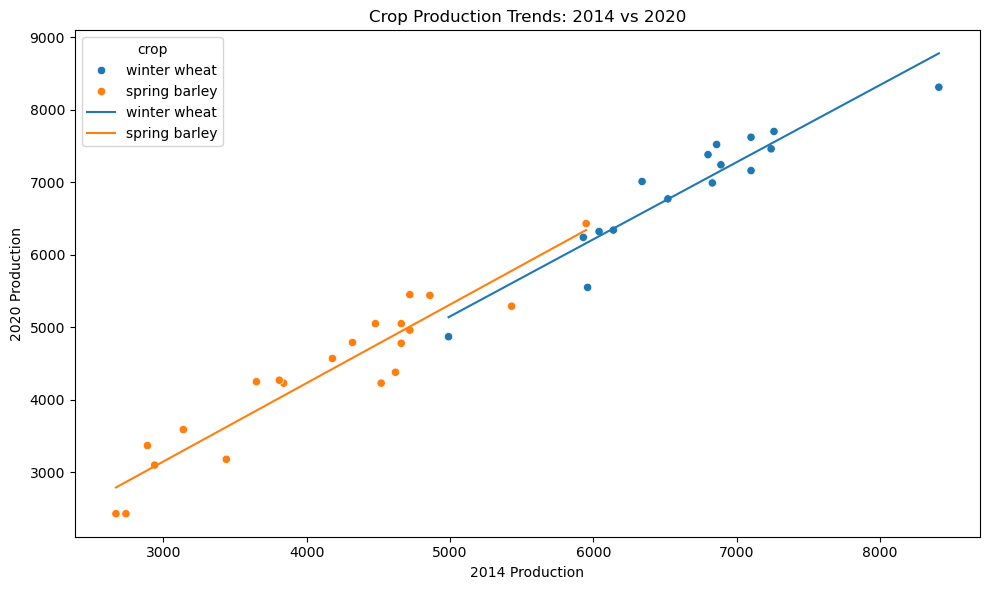

In [99]:
import seaborn as sns
from sklearn.linear_model import LinearRegression

selected_crops = ['winter wheat', 'spring barley']  # Example crops

# Filter and prepare data
plot_df = df[df['crop'].isin(selected_crops)].copy()

# Initialize prediction column
plot_df['predicted_2020'] = None

# Fit models and predict for each crop
for crop in selected_crops:
    crop_data = plot_df[plot_df['crop'] == crop]
    X = crop_data['2014'].values.reshape(-1, 1)
    y = crop_data['2020'].values
    
    model = LinearRegression().fit(X, y)
    plot_df.loc[plot_df['crop'] == crop, 'predicted_2020'] = model.predict(X)

# Create plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_df, x='2014', y='2020', hue='crop')
sns.lineplot(data=plot_df, x='2014', y='predicted_2020', hue='crop')
plt.title('Crop Production Trends: 2014 vs 2020')
plt.xlabel('2014 Production')
plt.ylabel('2020 Production')
plt.tight_layout()
plt.show()

**10. Create residual plots for both crop production models.**

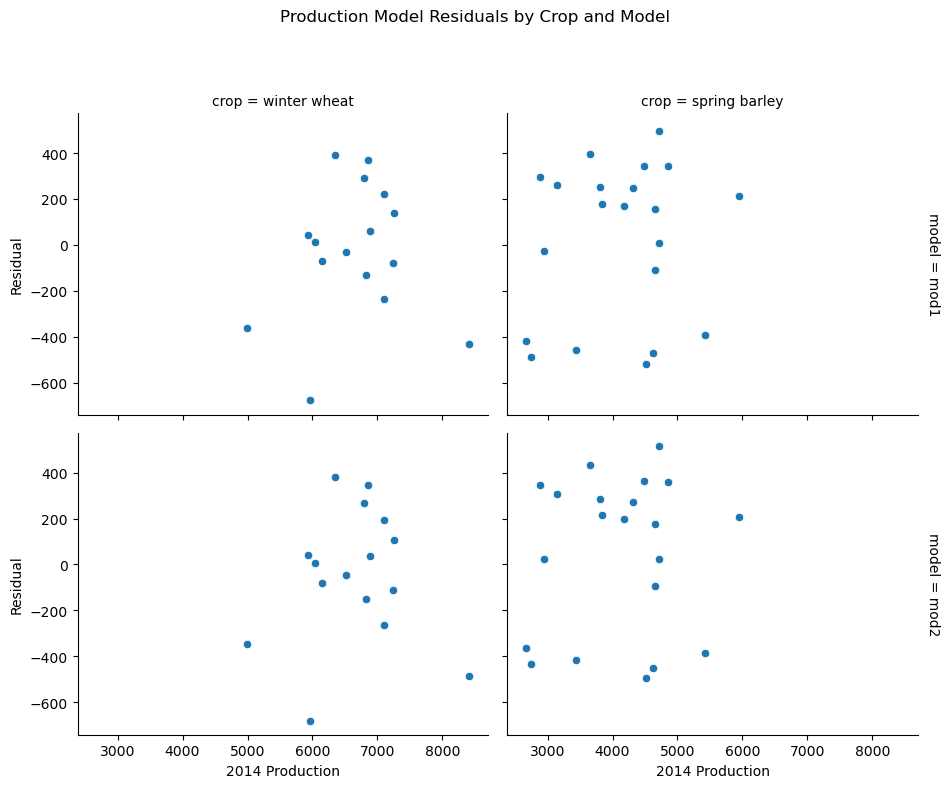

In [100]:
crops = ['winter wheat', 'spring barley']
crop_data = df[df['crop'].isin(crops)]

# Initialize models and storage
models = {'mod1': LinearRegression(), 'mod2': LinearRegression(fit_intercept=False)}
residuals = []

# Fit models and calculate residuals
for model_name, model in models.items():
    X = crop_data[['2014']].values
    y = crop_data['2020'].values
    model.fit(X, y)
    pred = model.predict(X)
    
    # Store residuals with metadata
    residuals.append(pd.DataFrame({
        'production_2014': X.flatten(),
        'residual': y - pred,
        'crop': crop_data['crop'],
        'model': model_name
    }))

# Combine residuals and plot
resid_df = pd.concat(residuals)
g = sns.FacetGrid(resid_df, row='model', col='crop', 
                 height=4, aspect=1.2, margin_titles=True)
g.map(sns.scatterplot, 'production_2014', 'residual')
g.set_axis_labels("2014 Production", "Residual")
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Production Model Residuals by Crop and Model')
plt.show()


  ### Tidymodels
**11. Tidymodels is a collection of packages that attempts to address this by providing a unified interface for model fitting, predicting, and evaluating.**

In [102]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
df_grouped = (
    preprocessed_yield_data[["region", "crop", "2014", "2023"]]
    .groupby(["region", "crop"], as_index=False)
    .mean()
)

# Features (X) and Target (y)
X = df_grouped[["2014", "crop"]]
y = df_grouped["2023"]

# Step 2: Preprocessing
# - OneHotEncoder for "crop" (drop one level to avoid multicollinearity)
# - Passthrough "2014"
preprocessor = ColumnTransformer(
    transformers=[
        ("crop", OneHotEncoder(drop="first"), ["crop"])
    ],
    remainder="passthrough",
    verbose_feature_names_out=False,
    force_int_remainder_cols=False
)

# Step 3: Build the pipeline
pipeline_lr = make_pipeline(
    preprocessor,
    PolynomialFeatures(degree=2, interaction_only=True, include_bias=False),
    LinearRegression()
)

# Step 4: Fit the pipeline
pipeline_lr.fit(X, y)

print("Model fitting completed without warnings!")


Model fitting completed without warnings!


**12. Using a trained pipeline to make predictions .**

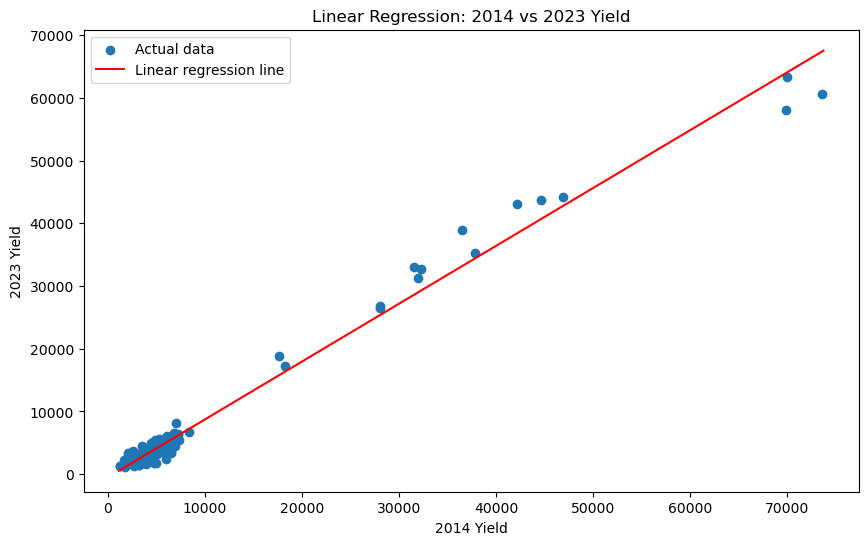

In [103]:
#Step 1: Prepare the data
df_grouped = (
    preprocessed_yield_data[["region", "crop", "2014", "2023"]]
    .groupby(["region", "crop"], as_index=False)
    .mean()
)

# Features (X) and Target (y)
X = df_grouped[["2014"]]  #  numerical feature
y = df_grouped["2023"]

# Step 2: Build the model (Linear Regression without one-hot encoding)
model = LinearRegression()

# Step 3: Fit the model
model.fit(X, y)

# Step 4: Create new input data for plotting
x_min, x_max = X['2014'].min() - 100, X['2014'].max() + 100
X_plot = pd.DataFrame({'2014': np.linspace(x_min, x_max, 100)})  # create a range of values for plotting

# Step 5: Make predictions
y_pred = model.predict(X_plot)

# Step 6: Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label="Actual data")  # Scatter plot of actual data
plt.plot(X_plot, y_pred, color='red', label="Linear regression line")  # Line plot of predictions
plt.xlabel("2014 Yield")
plt.ylabel("2023 Yield")
plt.title("Linear Regression: 2014 vs 2023 Yield")
plt.legend()
plt.show()

**13. The root mean squared error (RMSE)_ of this linear regression model.**

In [105]:
from sklearn.model_selection import cross_val_score
# Filter data for Stockholm county and winter wheat
stockholm_wheat = preprocessed_yield_data[
    (preprocessed_yield_data['region'] == '01 Stockholm county') &
    (preprocessed_yield_data['crop'] == 'winter wheat')
]

# Extract years and production values
years = [str(year) for year in range(2014, 2023)]
production = stockholm_wheat[years].values.flatten()

# Prepare the data for the model
X = pd.DataFrame({'year': range(2014, 2023)})
y = production

# Linear Regression with cross-validation
lr_model = LinearRegression()
cv_scores_lr = cross_val_score(
    lr_model,
    X,
    y,
    cv=5,  
    scoring="neg_root_mean_squared_error"
)

# Calculate RMSE for Linear Regression
rmse_lr = -cv_scores_lr.mean()
print(f"Linear Regression Model RMSE (5-fold CV): {rmse_lr:.2f}")


Linear Regression Model RMSE (5-fold CV): 850.19


**14. Fit a random forest regressor and plot it.**

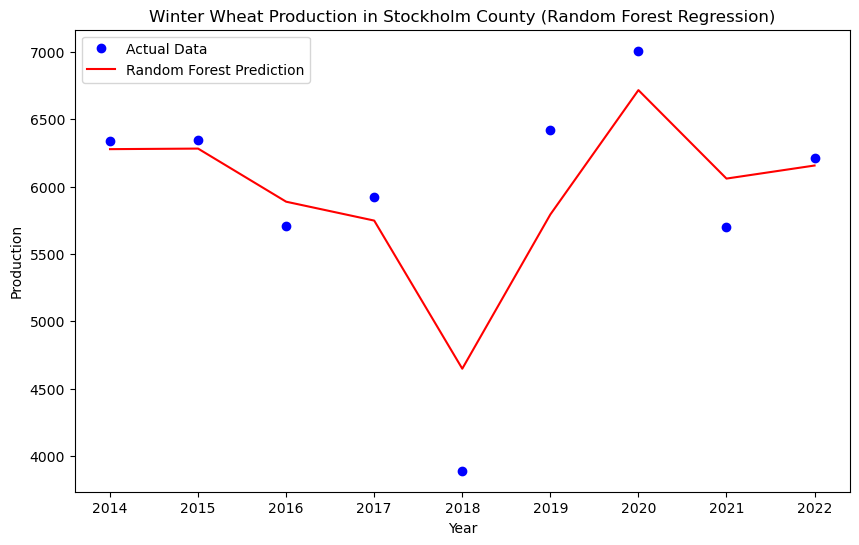

In [106]:
from sklearn.ensemble import RandomForestRegressor
# Filter data for Stockholm county and winter wheat
stockholm_wheat = preprocessed_yield_data[
    (preprocessed_yield_data['region'] == '01 Stockholm county') &
    (preprocessed_yield_data['crop'] == 'winter wheat')
]

# Extract years and production values
years = [str(year) for year in range(2014, 2023)]
production = stockholm_wheat[years].values.flatten()

# Prepare the data for the model
X = pd.DataFrame({'year': range(2014, 2023)})
y = production

# Fit the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=1000, max_features=2, random_state=42)
rf_model.fit(X, y)

# Generate predictions for the same range of years
X_pred = pd.DataFrame({'year': range(2014, 2023)})
predictions = rf_model.predict(X_pred)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(X['year'], y, 'bo', label='Actual Data')
plt.plot(X_pred['year'], predictions, 'r-', label='Random Forest Prediction')
plt.xlabel('Year')
plt.ylabel('Production')
plt.title('Winter Wheat Production in Stockholm County (Random Forest Regression)')
plt.legend()
plt.show()


**15. The root mean squared error (RMSE) of this random forest regression model.**

In [109]:
from sklearn.model_selection import cross_val_score
# Random Forest Regressor with cross-validation
rf_model = RandomForestRegressor(n_estimators=1000, max_features=2, random_state=42)
cv_scores_rf = cross_val_score(
    rf_model,
    X,
    y,
    cv=5,  
    scoring="neg_root_mean_squared_error"
)

# Calculate RMSE for Random Forest
rmse_rf = -cv_scores_rf.mean()
print(f"Random Forest Model RMSE (5-fold CV): {rmse_rf:.2f}")


Random Forest Model RMSE (5-fold CV): 828.94
